In [378]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat
from uncertainties import unumpy as unp

from spe_funcs import load_data

In [379]:
files = [
    # "data/Energiespektrum-Na22-BaF2-300s.Spe",
    # "data/Energiespektrum-Na22-NaI-328s.Spe",
    "data/Energiespektrum-Co60-BaF2-300s.Spe",
    "data/Energiespektrum-Co60-NaI-263s.Spe"
]

### Choose a file out of the files list to determine the fwhm on

In [380]:
file = files[0]

In [381]:
data, roi = load_data(file, only_roi=False)
roi = np.arange(4300, 5000)
data = data[roi]

In [382]:
data_stds = 0.01* data

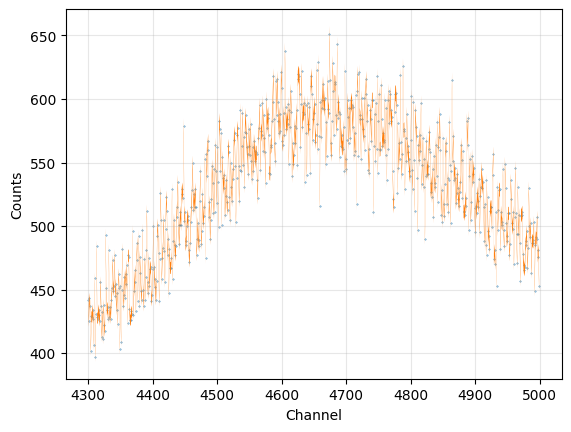

In [383]:
plt.scatter(roi, data, s=0.1)
plt.fill_between(roi, data-data_stds, data+data_stds)
plt.grid(alpha=.3)
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

In [384]:
from lmfit.models import GaussianModel, LinearModel
peak = GaussianModel()
background = LinearModel()
model = peak + background

In [385]:
init_values = {
    'amplitude': {'value': max(data)-min(data), 'min': 0},
    'center': {'value': roi[np.where(data == max(data))[0][0]], 'min': roi[0], 'max': roi[-1]},
    'sigma': {'value': 200, 'min': 0, 'max': 1000},
    'slope': {'value': -1, 'min': -10, 'max': 0},
    'intercept': {'value': 500, 'min': 0, 'max': 5000},
}
params = model.make_params(**init_values)
params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude       254        0      inf     None     True     None     None
center         4674     4300     4999     None     True     None     None
fwhm            471     -inf      inf     None    False 2.3548200*sigma     None
height       0.5067     -inf      inf     None    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept       500        0     5000     None     True     None     None
sigma           200        0     1000     None     True     None     None
slope            -1      -10        0     None     True     None     None


In [386]:
result = model.fit(data, params, x=list(roi), weights=1./data_stds)
result.params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.759e+05        0      inf 4.604e+04     True     None     None
center         4694     4300     4999    12.76     True     None     None
fwhm          652.8     -inf      inf    69.65    False 2.3548200*sigma     None
height        253.2     -inf      inf    39.43    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept     330.4        0     5000    108.6     True     None     None
sigma         277.2        0     1000    29.58     True     None     None
slope      -6.11e-10      -10        0   0.0865     True     None     None


In [387]:
fitted_params = result.params
x = np.linspace(min(roi), max(roi), 1000)
y = model.eval(x=x, params=fitted_params)

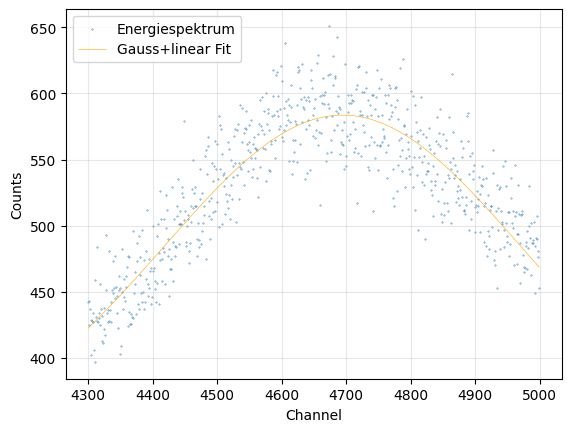

In [388]:
plt.scatter(roi, data, s=0.1, label='Energiespektrum')
plt.plot(x, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

In [389]:
centerone = ufloat(fitted_params['center'].value, fitted_params['center'].stderr)
print(centerone)

4694+/-13


In [390]:
data, roi = load_data(file, only_roi=False)
roi = np.arange(400, 1800)
data = data[roi]

In [391]:
data_stds = 0.01*data

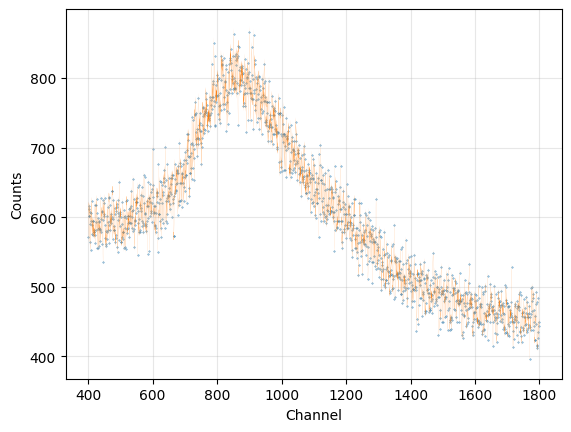

In [392]:
plt.scatter(roi, data, s=0.1)
plt.fill_between(roi, data-data_stds, data+data_stds)
plt.grid(alpha=.3)
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

In [393]:
from lmfit.models import GaussianModel, LinearModel
peak = GaussianModel()
background = LinearModel(prefix = 'snd')
model = peak + background

In [394]:
init_values = {
    'amplitude': {'value': max(data)-min(data), 'min': 0},
    'center': {'value': roi[np.where(data == max(data))[0][0]], 'min': roi[0], 'max': roi[-1]},
    'sigma': {'value': 100, 'min': 0, 'max': 1000},
    'slope': {'value': -1, 'min': -10, 'max': 0},
    'intercept': {'value': 500, 'min': 0, 'max': 5000},
}
params = model.make_params(**init_values)
params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude          470        0      inf     None     True     None     None
center             900      400     1799     None     True     None     None
fwhm             235.5     -inf      inf     None    False 2.3548200*sigma     None
height           1.875     -inf      inf     None    False 0.3989423*amplitude/max(1e-15, sigma)     None
sigma              100        0     1000     None     True     None     None
sndintercept         0     -inf      inf     None     True     None     None
sndslope             1     -inf      inf     None     True     None     None


In [395]:
result = model.fit(data, params, x=list(roi), weights=1./data_stds)
result.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude     1.141e+05        0      inf     2438     True     None     None
center             909      400     1799    2.354     True     None     None
fwhm             448.8     -inf      inf     7.22    False 2.3548200*sigma     None
height           238.9     -inf      inf    2.856    False 0.3989423*amplitude/max(1e-15, sigma)     None
sigma            190.6        0     1000    3.066     True     None     None
sndintercept     612.7     -inf      inf    4.847     True     None     None
sndslope      -0.08834     -inf      inf 0.003033     True     None     None


In [396]:
fitted_params = result.params
x = np.linspace(min(roi), max(roi), 1000)
y = model.eval(x=x, params=fitted_params)

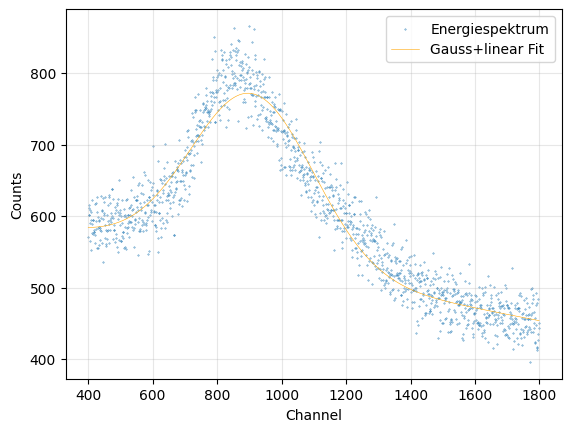

In [397]:
plt.scatter(roi, data, s=0.1, label='Energiespektrum')
plt.plot(x, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()

In [398]:
centertwo = ufloat(fitted_params['center'].value, fitted_params['center'].stderr)
print(centerone)

4694+/-13


In [399]:
resolution = abs((1173.237-346.93)/(centerone-centertwo))
print(f'Resolution: {resolution} keV/channel')
print(centerone*resolution-1173.237)
print(centertwo*resolution-346.93)

Resolution: 0.2183+/-0.0007 keV/channel
-148.5+/-0.9
-148.5+/-0.9


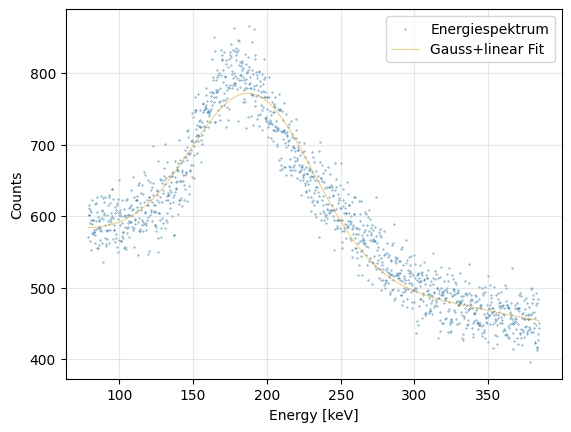

In [400]:
plt.scatter(roi*resolution.n-8.3, data, s=0.1, label='Energiespektrum')
plt.plot(x*resolution.n-8.3, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

In [401]:
print(f'Energy resolution of BAF2 detector: {resolution} keV/channel')

Energy resolution of BAF2 detector: 0.2183+/-0.0007 keV/channel
